#**Final Report**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import requests
from io import BytesIO

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Folder/

/content/gdrive/MyDrive/Folder


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Folder/data/HAM10000_metadata.csv')

## Title: New Era Of Data Model Dermatology

## Abstract
Skin cancers are the development of abnormal skin cells that have acquired the ability to invade or spread to other parts of the body. They are the most commonly diagnosed cancer in the United States and many cases are preventable. Skin cancer greatly impacts the quality of life, from both medical and socioeconomics standpoint. It is expected that the skin cancer incidence rates will continue to trend upward as the societal population ages. Research has shown that skin cancer diagnostic accuracy is in the range of 67-75%, meaning that the remaining 25-33% of the skin cancers are either incorrectly diagnosed as eczema or another less serious disease. Ultimately, this problem would lead us to ask whether machine learning models can be designed and implemented to effectively classify if a patient developed skin cancer based on photographs of skin lesions on dermatologic slides. The main objective of our project is to develop models to classify skin lesions into seven categories and have a diagnostic accuracy that can consistently match or outperform human benchmarks by emphasizing on the recall and precision rate in detecting skin cancers. We want to obtain a higher F1 score for skin cancers, which is a metric that takes a harmonic mean between precision and recall, and it represents a better metric for an imbalanced dataset. Early skin malignancy detection is important because it helps save life. Till today, we still have limited screening methods and resources toward skin cancer in clinical settings and oftentimes if a skin malignancy is suggested, it has already transitioned into the late stage for the patient. Therefore, accurate skin cancer detection is the key, it will essentially improve survival rate, clinical outcome and quality of life for the patient. In the process of incorporating a series of machine learning techniques to help us build a model that can distinguish skin cancers from other skin lesion conditions. A convulsion neural network model was selected and built with the accuracy of matching human benchmark; lower end of the human benchmark can be achieved if 90 x 90 pixels images were used and higher end of the human benchmark can be achieved if 240 x 240 pixels images were used. Alongside, we also identified age and localization to be very effective features during model training. One versus rest is effective for basal cell carcinoma, but not melanoma. Additionally, it is worth noting that our data suffer from biases coming from skin lesions of lighter skin origin only, which can result in skewed outcomes and analytical errors if darker skin dermatologic images were introduced.

## Introduction

In this project, comprehensive data exploration, modeling and analysis will be performed on Skin Cancer MNIST: Ham10000 dataset. It contains 10015 dermatoscopic images and labels are the seven diagnostic categories of the skin tumors, of which 5 are benign and 2 are malignant. The research question for this project is: can machine learning models be designed and implemented to effectively classify if a patient developed skin cancer based on photographs of skin lesions on dermatologic slides and have a diagnostic accuracy that can consistently match or outperform human benchmarks? Early skin malignancy detection is important because screening for skin cancer remains limited in clinical settings, which leads to late stage diagnoses in most cases. Accurate skin cancer detection in patients by dermatologists and pathologists show improved survival, clinical outcomes, and quality of life. In this project our goal is to build a model that can match or better human benchmark and achieve higher F1 score for skin cancers for the 2 skin cancers (Melanoma and Basal Cell Carcinoma).

The research plan includes initial data cleaning and exploratory data analysis to investigate data patterns, anomalies, test hypotheses and to check assumptions with the help of summary statistics and graphical representations. Some key points to takeaway from data preprocessing are: the age column has some missing value and the dataset label is imbalanced due to the fact that skin cancers are rare occurrences relative to the overall general population. To combat missing values, we fill in the missing age columns with the average for the age column. For imbalanced data, we incorporated undersample, data augmentation and weight calculation into data preprocessing. During feature selection, we observed that models significantly improved with age and localization taking into account. During model selection, we divide the image data pixel by 255 to normalize the image data, reducing the value in each pixel to between 0 to 1. We also applied principle component analysis (PCA) for our data to reduce the amount of features from 24,320 to 632, with 99% variance retained. PCA results are used in the sklearn models like Ridge Classifier, Logistic Classifier, Support Vector Machines, and Random Forest. also for the keras models like Dense Neural Network(DNN). Note, PCA was not used for CNN because the model required actual image structure as input. Overall, we observed that CNN (EfficientNet B1) won from the model selection stage; with validation accuracy, melanoma F1 score and basal cell carcinoma F1 score higher than all other models. But we do see some issues regarding model overfitting with CNN (EfficientNet B1). We picked the EfficientNet model to be our model for further tuning and training. We dentified the optimal set for learning rate and numbers of nodes are 0.001 and 288. Subsequently, the one vs. all technique was used. This transitioned multi-class classification problem to a binary classification problem. The labels for melanoma (mel) and basal cell carcinoma (bcc) will be updated to 1 in each of their own one vs. all training, with the remaining labels set to 0. The confusion matrix and the classification report suggested that the one vs. all strategy slightly improve model distinguishing both mel and bcc. At last our model did achieved the lower bound of the human benchmark using the 90 x 90 pixels images. We then trained our model with higher resolution images (240 x 240 pixels), the F1 score for the two cancer cells also significantly improved and it achieved the higher end of the human benchmark.

## Background

Till today, we still have a limited set of screening methods and resources allocated to skin tumor detection in clinical settings. Currently, skin tumor screening involves a visual examination of moles or birthmarks that are unusual in color, size, shape, or texture by the health care provider. In case a suspicious-looking skin is observed, the doctor may perform a skin biopsy to remove that piece of skin for laboratory testing, such as testing for a certain tumor marker elevation. 

With decades of practice, dermatoscopy is the predominant gold standard diagnostic technique that helps in the diagnosis of benign and malignant skin lesions in comparison to examination with the unaided eye (1). In one prior research work on the classification of skin tumors into malignant or benign using machine learning and deep learning models. Machine learning algorithms include logistic regression(LR), linear discriminant analysis(LDA), k-nearest neighbors classifier (KNN), decision tree classifier(DTC) and Gaussian naive Bayes(GNB). On the other hand, deep learning models were based on a custom Convolutional Neural Network model or leverage transfer learning via the use of pre-trained models (VGG16, Xception and ResNet50). The results showed that deep learning models, with accuracies up to 0.88, outperform machine learning models, which have accuracies of 63.7%, 65.8%, 68.9%, 71.1%, and 72.1% for GNB, KNN, DTC, LDA, and LR, respectively. However, ensemble learning of the machine learning models exhibit accuracies up to 0.75. Subsequently, they further test the performance of machine learning and deep learning models on a larger and more imbalanced dataset and metrics of 0.70 and 0.88 are obtained, respectively (2).

Dermatoscopic images are a great available source to train artificial neural networks to categorize the skin lesions automatically. Binder and his colleagues have long demonstrated such a technique to differentiate melanomas from melanocytic nevi, dating back to 1994 (3). Interestingly, the study suffered from small sample size but managed to obtain promising results. Recent advancement in the complexity of neural networks in machine learning techniques is accelerating the innovative ideas that one day automated diagnostic systems will work synchronously or asynchronously with expertise skills to improve the diagnosis accuracy for skin tumor detection (4). Training of neural-network based diagnostic algorithms is functionally dependent on the number of annotated images and labels by experts. However, the quantity of high quality and reliable dermatoscopic slides are only restricted to a few classes of diseases (5). The International Skin Imaging Collaboration (ISIC) archive is a collection of multiple databases. Because of permissive licensing, well-structured availability, and large size, ISIC archive is currently the standard source for dermatoscopic image analysis research. Note however, it tends to be biased towards melanocytic nevi lesions. The HAM10000 dataset that is incorporated in this project was originally released from ISIC archive. It appeared in a 2018 challenge, with the goal of enhancing diagnostic accuracy for distinguishing melanoma from other skin abnormalities and tumors.(6). 

Because there are limitation of the available datasets, biased research analysis toward melanocytic lesions and less emphasis were placed on non-melanocytic lesions in the past. Additionally, there are only a small diversity of available training data compared to the great variety of real life data, it can often results in a moderate performance of automated diagnostic systems in the clinical setting despite breakthrough achievements were observed in experimental settings (7,8) Building a classifier for multiple diseases are relatively more challenging compare to that of the binary classification (9). Currently, reliable multi-class predictions are only available for clinical images of skin diseases but not yet available for dermatoscopic images (10,11).


## Data

The dataset utilized in this project is HAM10000 (“Human Against Machine with 10000 training images”), it consists of 10015 dermatoscopic images. The labels are essentially the seven diagnostic categories of the skin tumors, of which 5 are benign and 2 are malignant. The malignant tumors are basal cell carcinoma (BCC) and melanoma (MEL) respectively. Benign  tumors are AKIEC, BKL, DF, NV, VASC. A metadata file with variables lesion_id, image_id, dx,dx_type, age, sex and localization can be obtained from the following link: https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification. Lesion id corresponds to the patient case id, Image id is the specific patient specimen id, Dx is the diagnosis of the skin lesion, Dx type is the diagnostic categories such as histopathology or follow up, age is the age of the patient, sex is the gender of the patient and localization is the area presence of the skin lesion on patient body. The HAM10000 dataset was originally from the International Skin Imaging Collaboration archive, which is the standard source for dermatoscopic image analysis research. The data appeared in a 2018 challenge, with the goal of enhancing diagnostic accuracy for distinguishing melanoma from other skin abnormalities and tumors. We want to make sure that our models are sensitive to these malignant tumor detection. Also note, Melanocytic nevi is a benign tumor label, it dominates the majority of our dataset, as we will see in the EDA section. Some detailed description for the labels are included below for references:


Actinic keratoses and intraepithelial carcinoma / Bowen's disease (AKIEC): Common non-invasive, variants of squamous cell carcinoma that can be treated locally without surgery. Actinic keratoses are more common on the face and Bowen’s disease is more common on other body sites. Induced by UV-light or human papilloma virus infection.

Basal cell carcinoma (BCC) Common variant of epithelial skin cancer that rarely metastasizes but grows destructively if untreated. 

Benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, BKL) "Benign keratosis" is a generic class that include three subgroups, may look different dermatoscopically, they are similar biologically and often reported under the same generic term histopathologically. 

Dermatofibroma (DF) Benign skin lesion regarded as either a benign proliferation or an inflammatory reaction to minimal trauma. 

Melanocytic nevi (NV) Benign neoplasms of melanocytes 

Melanoma (MEL) Malignant neoplasm derived from melanocytes that may appear in different variants. If excised in an early stage it can be cured by simple surgical excision.

Vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, VASC). Vascular skin lesions: cherry angiomas, angiokeratomas and pyogenic granulomas, hemorrhage.

In the data cleaning phase, after loading in the metadata and inspecting it using df.info(), some age entries are null, 9958 non-null compared to 10015 non-null for all other attributes. To resolve this, fill the null values with the average of the age column and change the type to integer. Checking again using df.isnull().sum() yields no missing values for any columns. Check to verify if the age column has any abnormal values by seeing the absolute minimum and maximum of the patient age using: [df['age'].min(),df['age'].max()], the minimum is 0 and maximum is 85. Therefore, no abnormal values were detected in the age column.  Next, print out all the unique values of each variable relevant to the patient. Two abnormal result were seen, sex column have values ['male' 'female' 'unknown'], and localization column have values ['scalp' … 'unknown' ... 'acral']. However we decided to keep unknown sex and unknown localization as their image and other data will contribute values to our further analysis.

## Methods

### EDA

In the exploratory data analysis phase, we want to visualize data, detect errors and outliers, discover relationships and patterns. To do this, we implemented both univariate analysis and bivariate analysis. In univariate analysis, we want to observe the frequency or count of each subcategory to a variable of interest. In all,  most patients screened for skin tumors are in the age of 30-60. That is, the histogram presented a slightly normal distribution look, this may imply that most abnormal looking skin lesions appeared around age 30 to 60 for an individual and need to be checked out to see if the skin lesion is normal. There are also slightly higher male patients presenting a skin lesion compared to female patients in the dataset. The top 5 skin tumor localization areas are the back, lower extremity, trunk, upper extremity and abdomen. Note that the dataset label is imbalanced if we refer to the following bar chart and pie chart; the majority of the diagnosis for skin lesions are melanocytic nevi, at about 66.5% of the total labels. This will affect our later model and metric analysis if undersample, data augmentation and weight calculation are not taken into account during the data preprocessing stage.


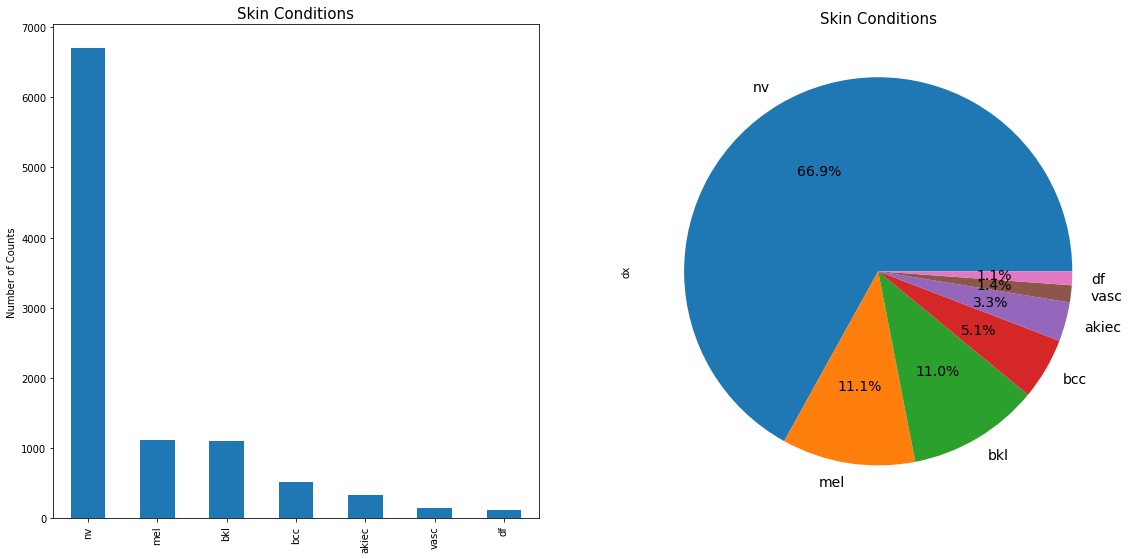

In [ ]:
plt.figure(figsize=(40,20))
plt.subplot(2,4,1)
plt.title("Skin Conditions",fontsize=15)
plt.ylabel("Number of Counts")
df['dx'].value_counts().plot.bar()
plt.subplot(2,4,2)
plt.title("Skin Conditions",fontsize=15)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%", fontsize=14)

*From the bar chart above, the dataset labels are imbalanced (Left). 
The majority of the diagnosis for skin lesions are melanocytic nevi at about 66.5% of the total labels (Right)*

 
The diagnosis type for skin lesions are either histopathology or follow-up, this makes sense because dermatologist or pathologist’s microscopic interpretation remain the gold standard for detecting skin cancer. 

In bivariate analysis, if the count of each skin lesion diagnosis is compared with the localization area (Localization vs Diagnosis), we can conclude that top five of the overall skin tumors presentation area are the back, trunk, upper and lower extremity and abdomen. With respect to melanoma and basal cell carcinoma, the most common presentation area for these maligant tumors are the back, upper and lower extremity.



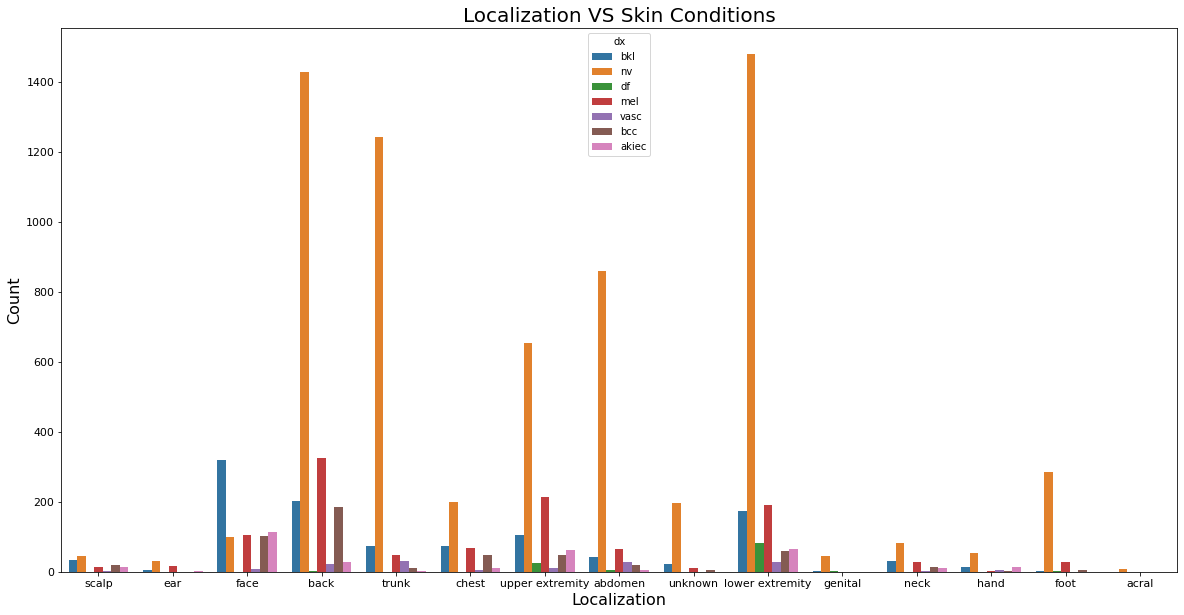

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Localization VS Skin Conditions',fontsize = 20)
sns.countplot(x='localization', hue='dx',data=df)
plt.xlabel('Localization', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=11)

*The top 5 of the overall skin tumors presentation area are the back, trunk, upper and lower extremity and abdomen. For melanoma and basal cell carcinoma, the most common presentation area are the back, upper and lower extremity.*

In describing the diagnosis pertaining to age groups (Age vs Diagnosis), we can see that the incidence rate of melanoma and basal cell carcinoma increased around age 40. The highest incidence rate for melanoma and basal cell carcinoma occurred at age 70. 

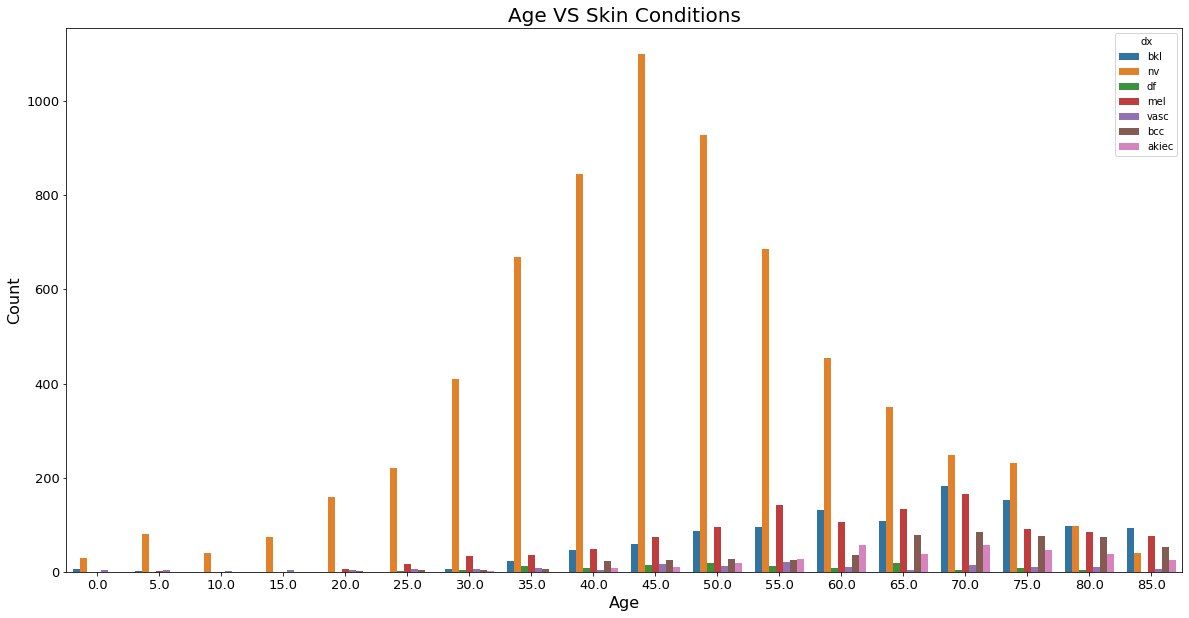

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Age VS Skin Conditions',fontsize = 20)
sns.countplot(x='age', hue='dx',data=df)
plt.xlabel('Age', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.tick_params(axis='both', which='major', labelsize=13)

*In Age vs. Diagnosis, the incidence rate of melanoma and basal cell carcinoma increased around age 40. The highest incidence rate for melanoma and basal cell carcinoma occurred at age 70.*

This is expected because cancer is essentially mutation accumulation as an individual ages, such genetic alteration either expresses cell proliferation or stops or reduces tumor suppressor gene regulators, or both. Important takeaway from this feature selection phase is that age and localization are important risk factors or variables in classifying the skin tumor in this project, as we can see during the model training. These two attributes had significantly improve the performance for most of the models we trained.

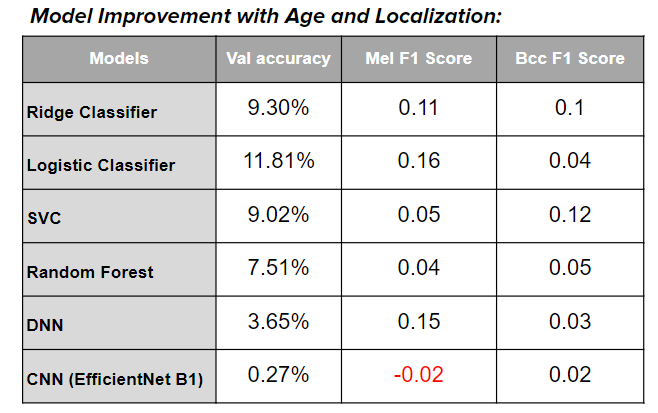

In [7]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/meta_data_improve.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is a summary for the improvement that each model has with age and localization included comparing to models that were trained with image data only. However, it doesn't seem to work too well on CNN. The performance for the CNN model is almost the same.*

### Workflow Design

The workflow for our pipeline started with extracting data from the database. Then we will perform EDA and data cleaning on the raw data. Afterward, we will go through a series of data preprocessing procedures. The data preprocessing procedures contain undersampling, normalize/rescale, train test split, data augmentation and weight calculation. Next, we will conduct test runs on multiple machine learning models and select the best performing model to proceed further. Later we will tune the hyperparameter for the model and train the model. At last, we will evaluate the model and decide if we are going to go back previous steps or save the trained model.

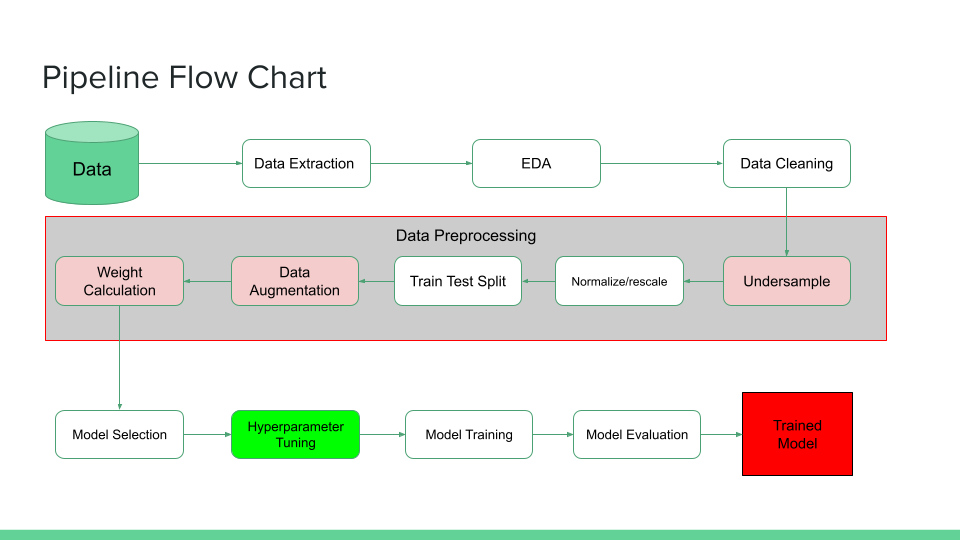

In [5]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/pipeline_flow.png"
response = requests.get(url)
Image.open(BytesIO(response.content))


### Processing Design

*The above is the Flow Chart for our pipeline from data extraction to data preprocessing and to model training and evaluation.*

From the above EDA section, we mentioned that one of the issues with our data set is imbalanced with the type of labels it has. About 67% of the data belong to “nv” and only about 11.1% and 5.1% to “mel” and “bcc”, the two cancer cells we are interested in. This will cause a problem for us. Our model will favor the majority in training due to its size and cause fewer resources to be allocated to two cancer cells that we want to focus on. To accommodate this issue, we incorporated undersample, data augmentation, and weight calculation into data preprocessing. Undersample will decrease the majority size in model training. Data augmentation will generate new images for targeted images through rotation and translation. Weight calculation will generate a dictionary that each skin lesion label is corresponding to a number that represents the weight that each particular label will contribute in loss calculation during model training. The fundamental logic behind these techniques is to balance the loss calculation in model training for labels through either balancing the data set by changing the proportion of each label or enhancing the weight of labels with a smaller sample size. These techniques were quite effective in our experiment, especially undersampling the majority size. For example, mel’s F1 score increased from 0.53 to 0.67 when we decreased the size for nv from 6000 to 1500.

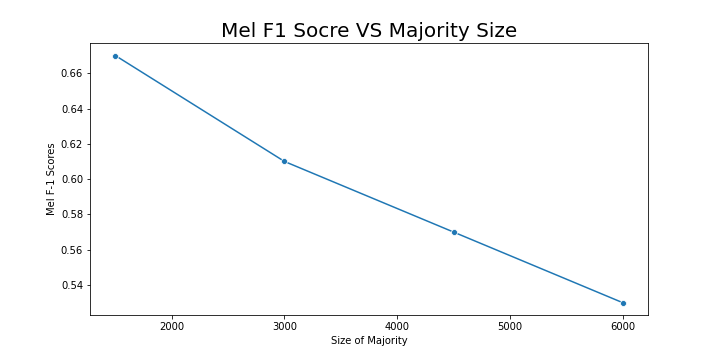

In [8]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/f1%20vs%20size.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This line plot shows the inverse relationship between the majority size and mel F1 score. We can see that the lower the majority size the higher the F1 score. Therefore, we untilized undersample to help us raise F1 score for mel and bcc.*

The normalize/rescale step in the preprocessing was to divide the image data pixel by 255 to normalize the image data. The normalized image data will reduce the value in each pixel to between 0 to 1. This will make the computation more efficient and stable. However, we will not rescale the data for the model implement EfficientNet since EfficientNet models expect the inputs to be float tensors of pixels with values in the [0-255] range. The train test split was used to split the data into training data and testing data. It is important that we split the data before the data augmentation. We want to ensure that the data we use for testing is unseen by the trained model. We also applied principle component analysis (PCA) for our data. The amount of features for image data is huge since each pixel represents a feature. After putting our data in PCA we reduce the number of features from 24320 to 632 with 99% variance retained. However, this process will not work for convolutional neural networks since we need to input the image data as an actual image structure for the model.

## Evaluation

### Model Selection

In this project, we do early test runs on multiple models and evaluate their validation accuracy, mel's F1 score, bcc’s F1 score, and the difference between training accuracy and validation accuracy. The validation accuracy is to measure the general performance. Mel’s and bcc’s scores are measuring the model’s performance in distinguishing these two cancer cells. The difference between training accuracy and validation accuracy is to measure the degree of overfitting of the model after training. The higher the difference the more overfit the model is. The models that we included in the test runs are the ridge classifier, logistic classifier, support vector classifier, random forest classifier, dense neural network(DNN), convolutional neural network(CNN), and CNN with EfficientNet. The ridge classifier, logistic classifier, support vector classifier, and random forest classifier were the four models we chose from sklearn. We selected them was to make sure that our problem could be solved by a relatively simple model. Unfortunately, the overall performance of sklearn models was not good enough. Their overall accuracy was between 62% - 73%, which wasn’t bad if we considered our problem as 7 muti-classes classification problem. However, we need to keep in mind that our data set was unbalanced and that the majority occupied around 67% of the total data. It was easy for a model to achieve a higher accuracy under this data set as the model can just focus on distinguishing the majority from others. We believe that these model structures were too simple to deal with image processing. Therefore, we built new models using neural networks, especially CNN as it is well known for image processing.

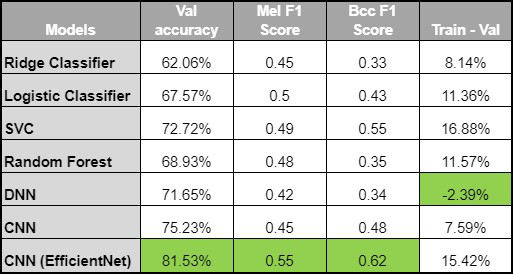

In [6]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/models_selection.jpg"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the table summarized the overall performance for each classifiers during the early test runs. The CNN model with EfficientNet is outperforming the other models. The data set we used are orginial data set which suffer from data imbalance. This explain the unusual high accuracy for each model.*

All the models are tested on the same data set. Per the result of the test runs, we found that CNN with EfficientNet has the best performance. It has the highest validation accuracy, mel’s F1 score, and bcc’s F1 score. It also has the second difference in training accuracy and validation accuracy, but its F1 score for the two cancer skin cell suggest its potential for being the best model. Therefore, we picked the EfficientNet model to be our model for further tuning and training. The DNN seemed to be the only model that didn’t suffer from overfitting. We suspected that is because the structure of our DNN is too simple. It only contained 4 layers and only 64 nodes on each layer. In addition, our L2 regularization and 0.45 dropout also contributed to lowering the difference between training accuracy and validation accuracy. After selecting the EfficientNet CNN model, we utilized the keras_tuner to tune the hyperparameters for our model. We selected the learning rate for our optimizer and the number of nodes in our Dense layer after EfficientNet for tuning. The learning rate had a direct impact on how well the model trains. It controlled the estimated error when the model weights were updated. If the learning is too small the model will suffer longer training and potential stack on local minimum. Alternatively, if it is too large, the model becomes unstable and unable to reach the optimal set of weights as each update will be too fast and big. The number of nodes can significantly impact the overfitting and underfitting issue. If there are too few nodes, we may suffer from underfitting. If there are too many nodes, we may suffer from overfitting. After multiple trials, we identified the optimal set for learning rate and numbers of nodes, which are 0.001 and 288.

### Model Training and Evaluation

After tuning and a series of training, we will give a detailed evaluation of our final model. From the Learning Curve - Accuracy graph we noticed that the validation accuracy topped around 20 epochs and the gap between validation accuracy and training accuracy started widening after 5 epochs. The sizable difference between validation accuracy and training accuracy indicated overfitting in our model. The Learning Curve - Loss told the same story as the gap between two curves started widening around 5 epochs and a gap continued to grow between the curves. The confusion matrix showed that our model got 512 correct out of 722 total labels. It is about 71% accuracy, which significantly lower than our early test run on the model during model selection. This is because the undersampling of the majority, data augmentation of the cancer cells, and the weight application on the model had made the model allocate more resources to other labels than the majority. As the labels were evenly distributed in the data set, it became harder for the model to achieve high accuracy by just doing well on distinguishing single labels. On the other hand, the performance on other labels all improved due to the balance of the data set. The F1 score of mel and bcc had improved from 0.55 and 0.61 to 0.65 and 0.68 respectively. This demonstrated that our strategies in data preprocessing procedures had worked as we expected. The goal of this project was to build a model that matches or beats the human benchmark for diagnosing skin cancers. The F1 score for the two cancer cells told us that our model fell within the lower range of the human benchmark using 90 x 90-pixel images.

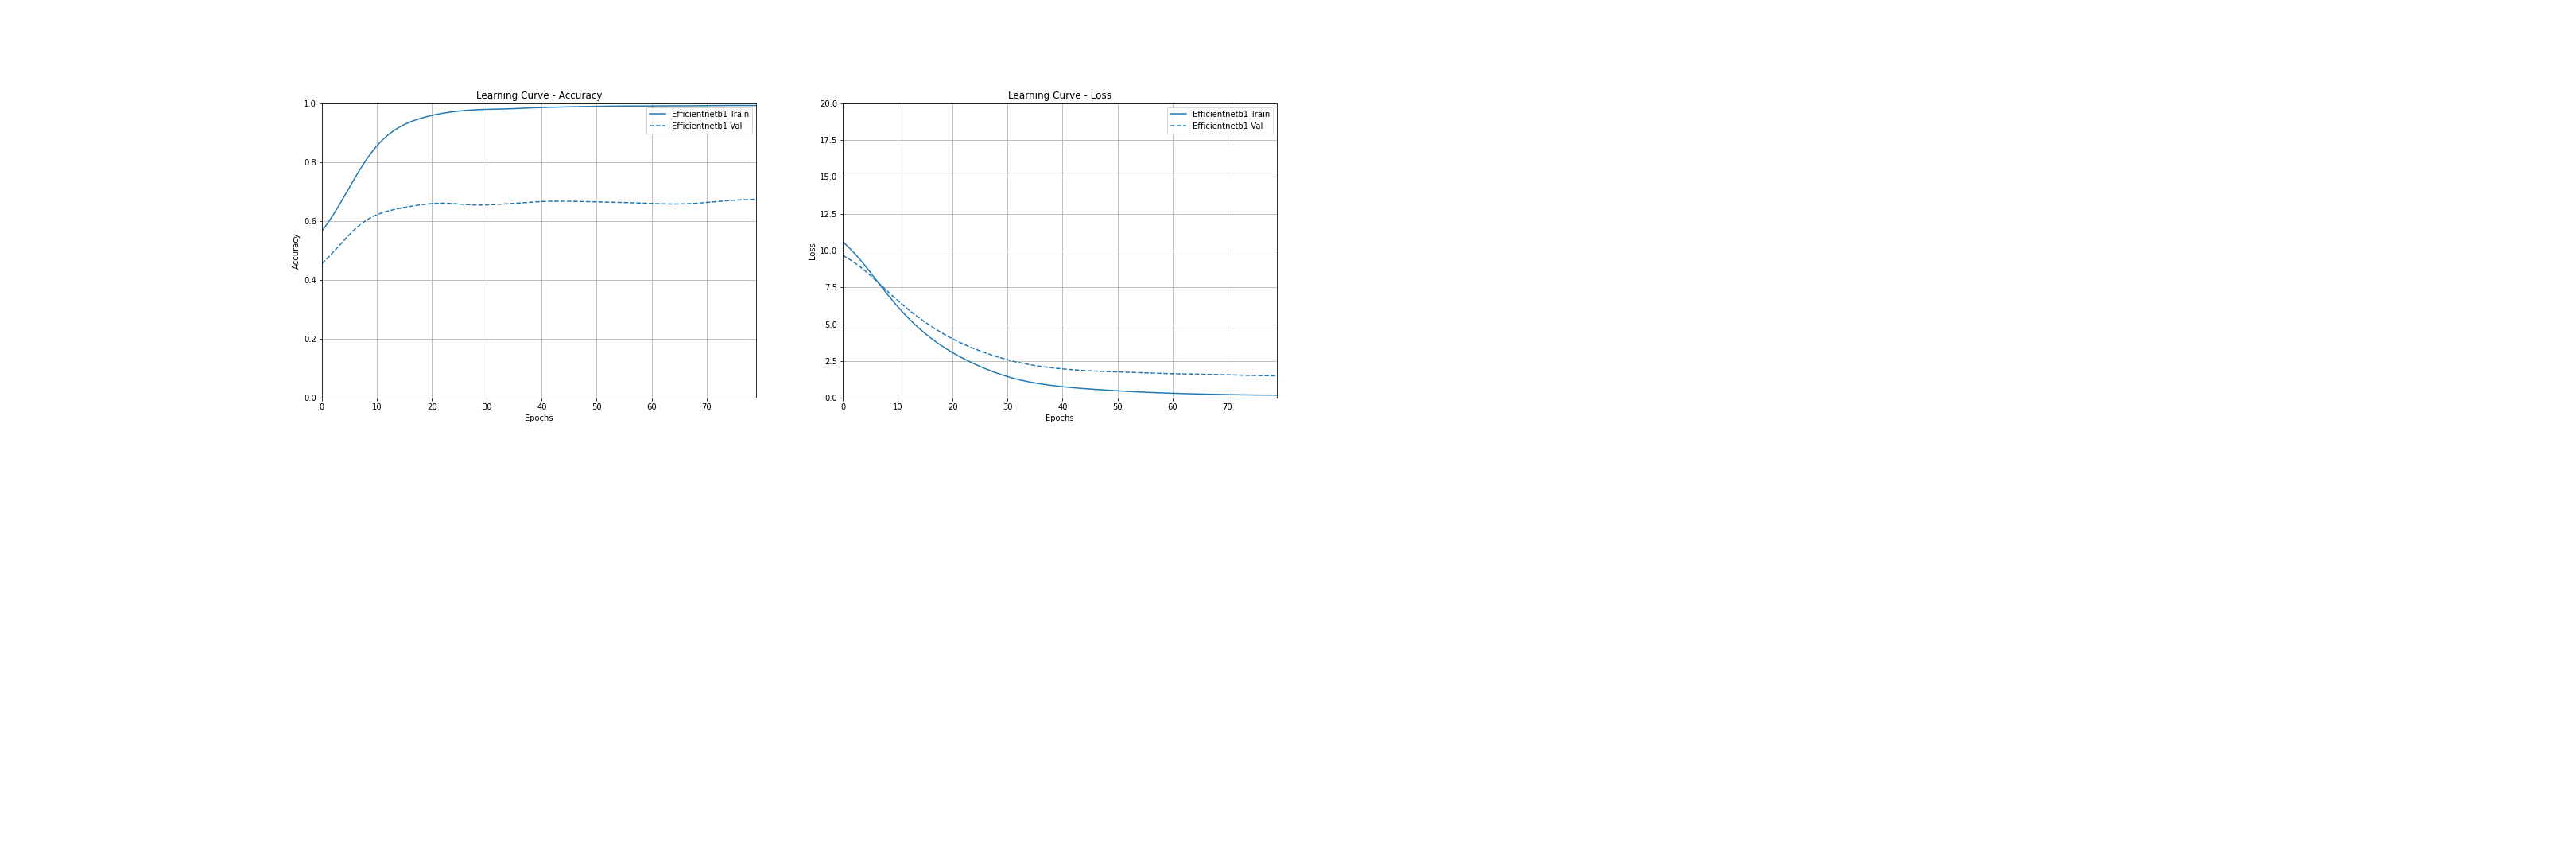

In [10]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/base/base_learning_curve.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*These are the learning curves for our CNN model. We can see that out model is overfitting after 5 epochs.*

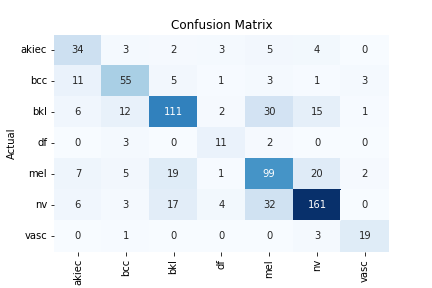

In [11]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/base/base_CM.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the Confusion Matrix for our model. We got 99 out of 153 for mel and 55 out of 79 for bcc.*

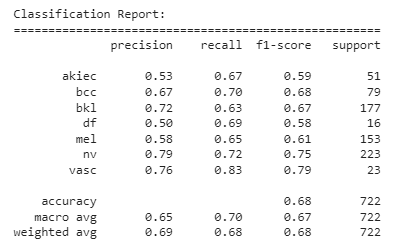

In [12]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/base/base_CR.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the classification report for our model. We can noticed that the F1 score for both mel and bcc had improved from 0.55 and 0.61 to 0.61 and 0.68. However, the overall accuracy dropped from 81% to 68%. This is acceptable since the model were trained with a much balance data set.*

### SHAP Analysis

We also performed a SHAP analysis on mel and bcc, the two skin cancer, to interpret how our model distinguishes them from other skin lesions. We selected 5 samples for each type of skin cancer and showed the five possible labels our model assigned in the order of possibility. For the 5 mel samples, our model got 4 out of 5. mel was ranked second in the possibility for the one that was wrongly classified. From the distribution of the SHAP value, we can see that our model distinguishes mel through the pixels in the surrounding, not much in the center. For the 5 bcc samples, our model got 3 out of 5, and only one of the miss classified ranked bcc second in possibility. From the distribution of the SHAP value, we can see that bcc has a very sparse distribution of positive SHAP values. From the image we can also see that the symptom of bcc also has a very sparse distribution. 

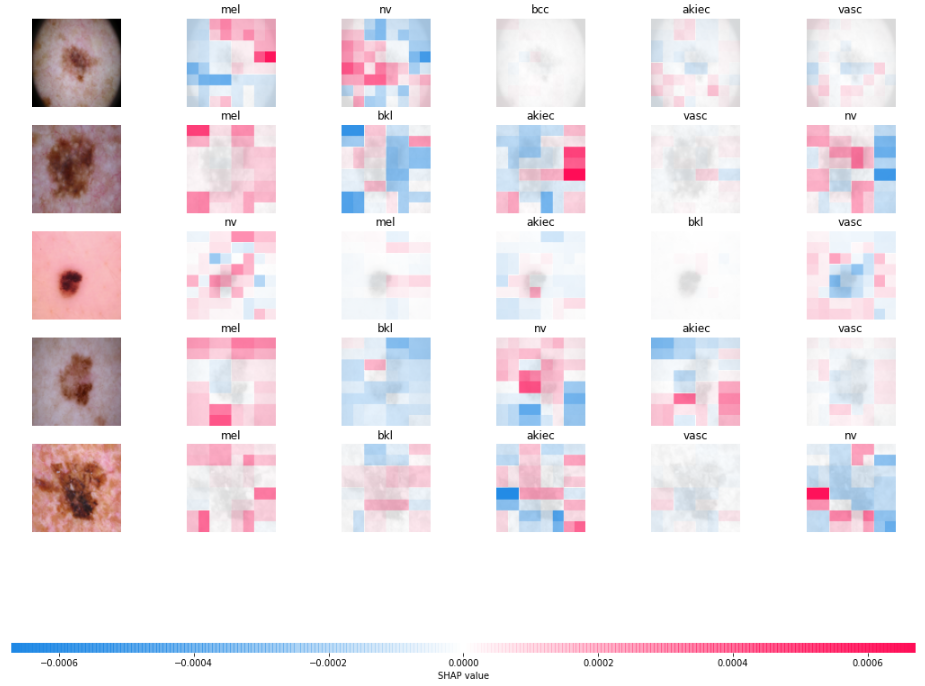

In [13]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/base/mel_SHAP.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is SHAP analysis for 5 mel samples. It shows 5 possible labels and ranks them in possibility from left to right. The model got 4 out of 5. The model is utilizeing the surrounding pixels to distinguish mel.*

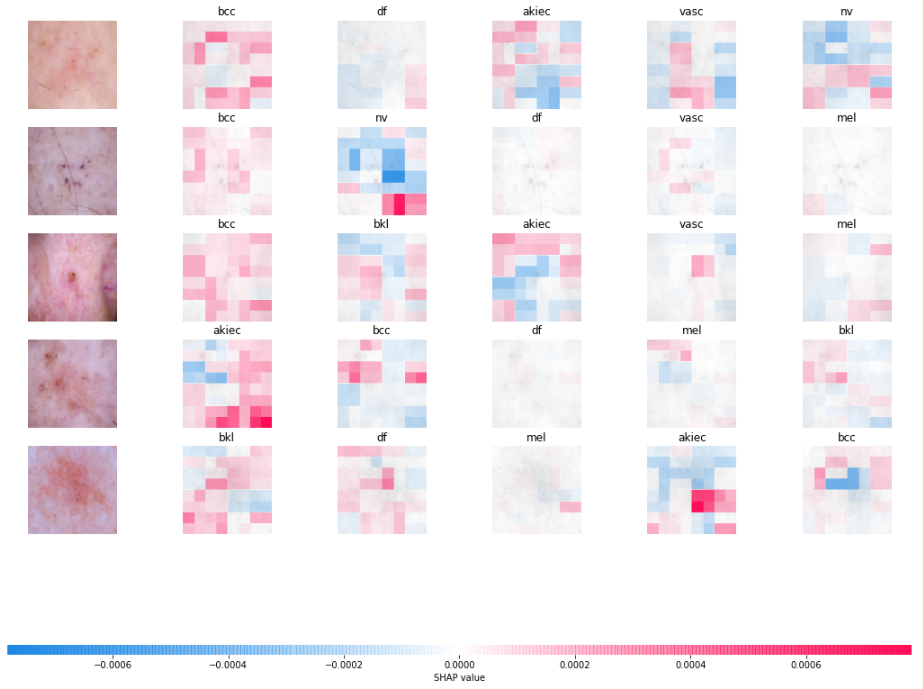

In [14]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/base/bcc_SHAP.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is SHAP analysis for 5 bcc samples. It shows 5 possible labels and ranks them in possibility from left to right. The model got 3 out of 5. The model is utilizeing a sparse distribution of pixels to distinguish bcc.*

### One vs. All

We took a step further to see if we could improve our model by applying the one vs. all technique to the two cancer cells. The one vs. all technique will change the problem from a multi-class classification problem to a binary classification problem. The cancer labels will be updated to 1 in each of their own one vs. all training. Then all other labels will be 0. This will help our model to focus on distinguishing the two cancer cells from all other skin lesions. The confusion matrix and the classification report suggested that the one vs. all strategy slightly improve model distinguishing both mel and bcc. The F1 score for bcc was improved from 0.68 to 0.71, whereas the F1 score of mel improved from 0.61 to 0.63.

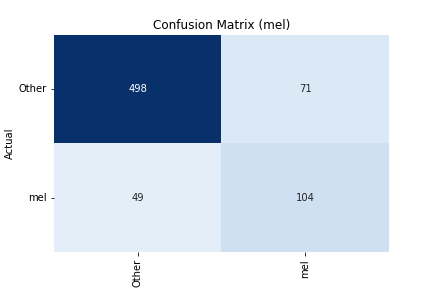

In [17]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/CM_onevsall_mel.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the confusion matrix for mel under one vs. all. It got 104 out of 153.*

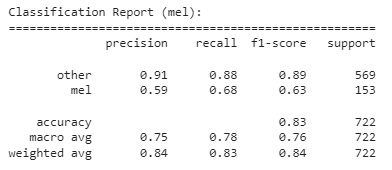

In [15]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/CR_mel.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the classification report for mel under one vs all. The F1 score was improve from 0.61 to 0.63.*

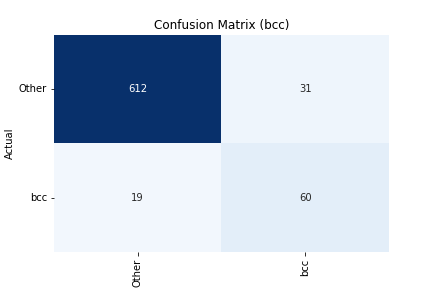

In [18]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/CM_onevsall_bcc.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the confusion matrix for bcc under one vs. all. It got 60 out of 79.*

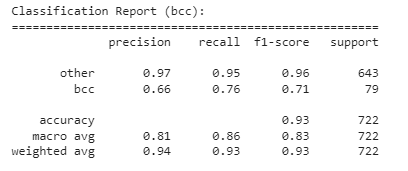

In [16]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/CR_bcc.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the classification report for bcc under one vs all. The F1 score was improve from 0.68 to 0.71.*

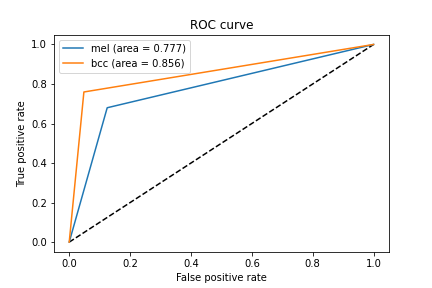

In [19]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/ROC.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the ROC curver for both mel and bcc under one vs all. We can see that out model is performing better on bcc than mel. We can tell from the area these two curves cover.*

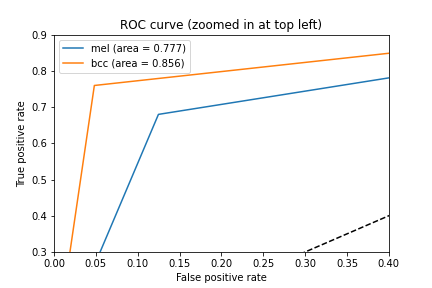

In [20]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/oneVsAll/ROC_zoom.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is zoom in version for the graph above. We can see that the turning point for mel is at 0.68 true positive rate and 0.13 false positive rate. The turning point for bcc is at 0.76 true positive rate and 0.05 false positive rate.*

### High Resolution Images

We also trained our model with higher resolution images (240 x 240 pixels). We expected our model performance to improve as higher resolution images will provide great details for the model. The learning curve graph for the model showed an overall improvement in model accuracy. Although the overfitting issue persisted, the difference between validation accuracy and training accuracy dropped from 29% to 21%. The confusion matrix showed that mel’s accuracy improved from 97/153 to 122/153 and pcc’s accuracy improved from 57/79 to 62/79. The F1 score for the two cancer cells also significantly improved per the classification report. The F1 score improved to 0.73 and 0.77 respectively of mel and bcc. The F1 scores suggested that our model fell within the higher end of the human benchmark when using higher resolution images.

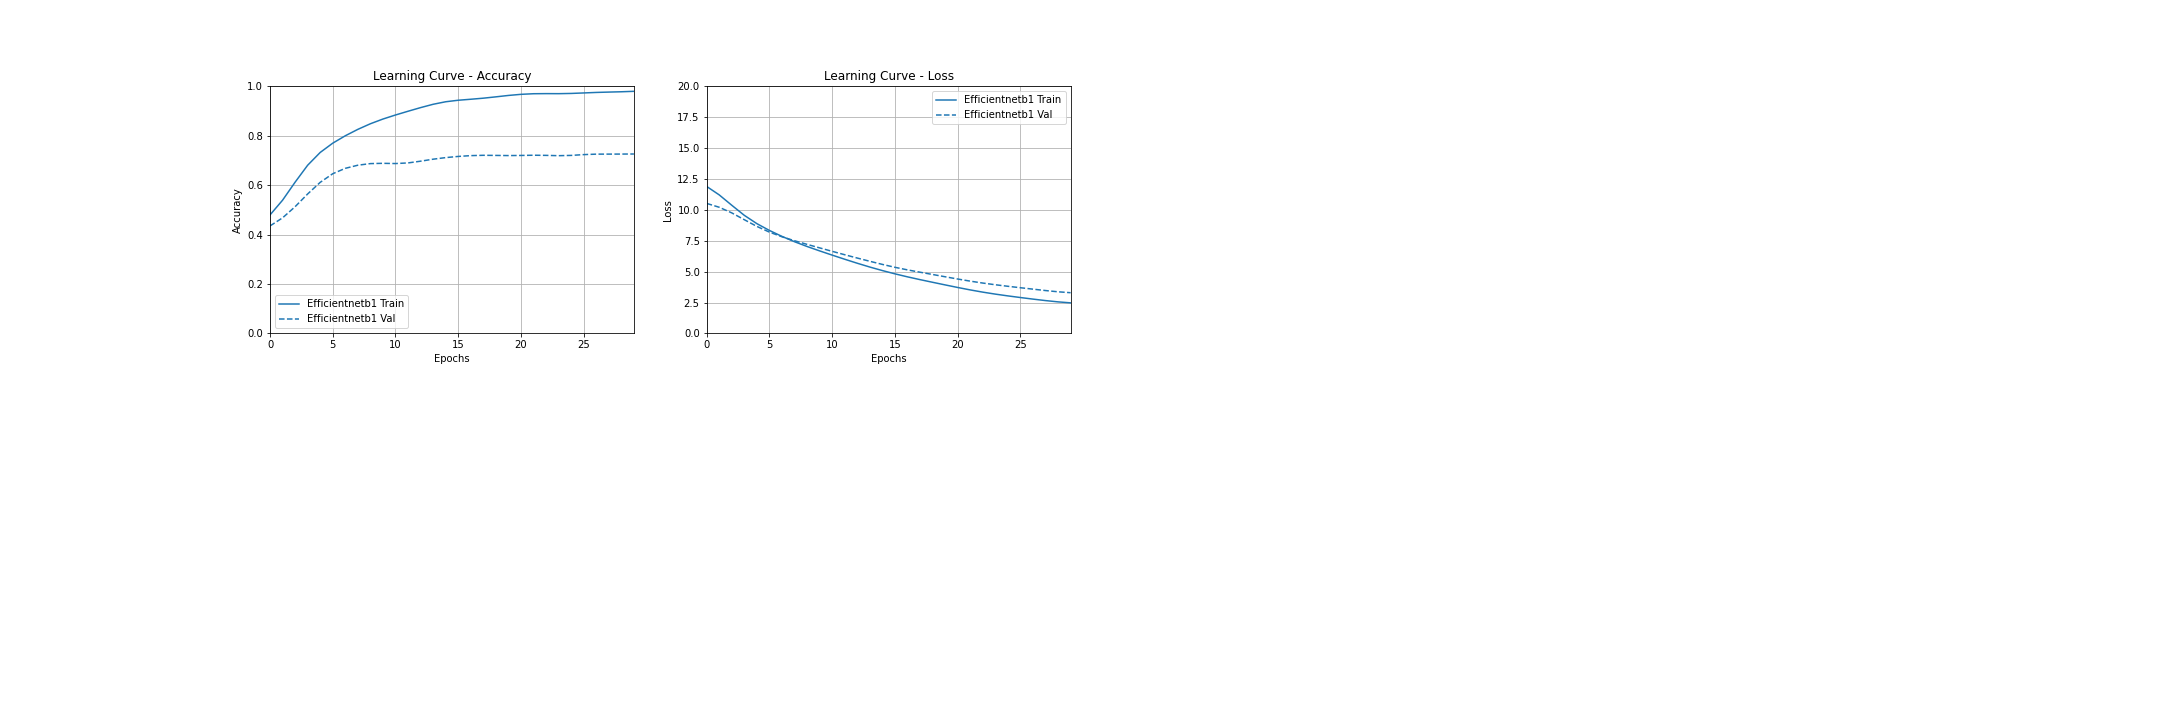

In [21]:
url = "https://raw.githubusercontent.com/HuihuangLiu001/DSEI210-Final-Project--Skinjob/main/reports/figures/high/high_learning_curve.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*These are the learning curves for our CNN model when using 240 x 240 resolution images. We can see that our model is still overfitting after 5 epochs, but the gap is small compare to when our model used 90 x 90 images*

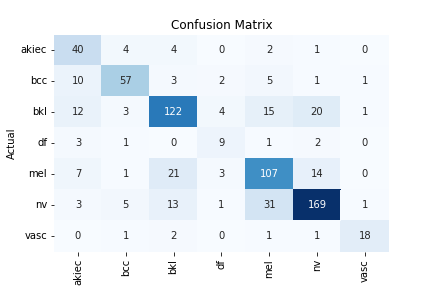

In [23]:
url = "https://raw.githubusercontent.com/HuihuangLiu001/DSEI210-Final-Project--Skinjob/main/reports/figures/high/high_CM.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the Confusion Matrix for our model when using 240 x 240 images. We got 107 out of 153 for mel and 57 out of 79 for bcc.*

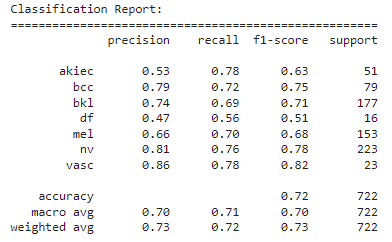

In [24]:
url = "https://raw.githubusercontent.com/HuihuangLiu001/DSEI210-Final-Project--Skinjob/main/reports/figures/high/high_CR.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*This is the classification report for our model when using 240 x 240 images. We can noticed that the F1 score for both mel and bcc had improved from 0.61 and 0.68 to 0.68 and 0.75. The overall accuracy is also increase from 68% to 72%. This is expected since high resolution image is providing better details.*

## Conclusion

In conclusion, our data preprocessing technique of downsampling, data augmentation, and applying weight were quite effective according to experimental data. They significantly improved the F1 scores for the two cancer cells. The model we built matched our goal for the project. It fell within the lower end of the human benchmark if using 90 x 90 pixels images and the higher end if using 240 x 240 pixels images. The SHAP analysis showed that our model used pixels on the sides and edges to tell mel, and it used a sparse distribution of pixels to tell bcc. Also, We found that age and localization were surprisingly effective in our model training. They almost improved all models in every evaluation aspect. Our research also showed that the one vs all technique slightly improved both mel's and bcc’s F1 scores. The ROC curves of mel and bcc suggested that our model is better at identifying bcc than mel. However, like all other research, there were limitations in our project. We noticed that our data set only contained patients with lighter skin. This may cause our model to suffer from biases. Also, we only had limited risk factor features if more features are available such as family history and pre-existing conditions, we can further improve our model.

## Attribution

Gong Qi Chen (githubID: albert6051):

Coding Hours: Can't remember the exact number but over 100 hours on EDA, Data preprocessing, model testing, hyperparameter tuning, data extraction and model evaluation combine.

Contribution:
I was working on coding and researching for the data extraction, EDA, data preprocessing, model testing, hyperparameter tuning, data extraction and model evaluation. I also prepared the method, evaluation and conclusion part of the project report. I also participated writing the persentation for projection presentation.

Huihuang (GithubID: Huihuang Liu and  HuihuangLiu001)

Coding Hours: 30 hours

Contributions: Initial data extraction, cleaning, EDA analysis and descriptions.
Sklearn models with or without PCA on Logistic, decision tree, SVM, KNN, random forest models. Tensorflow on linear, logistic and SVM. Report on Abstract, Introduction, Background, Data, Methods


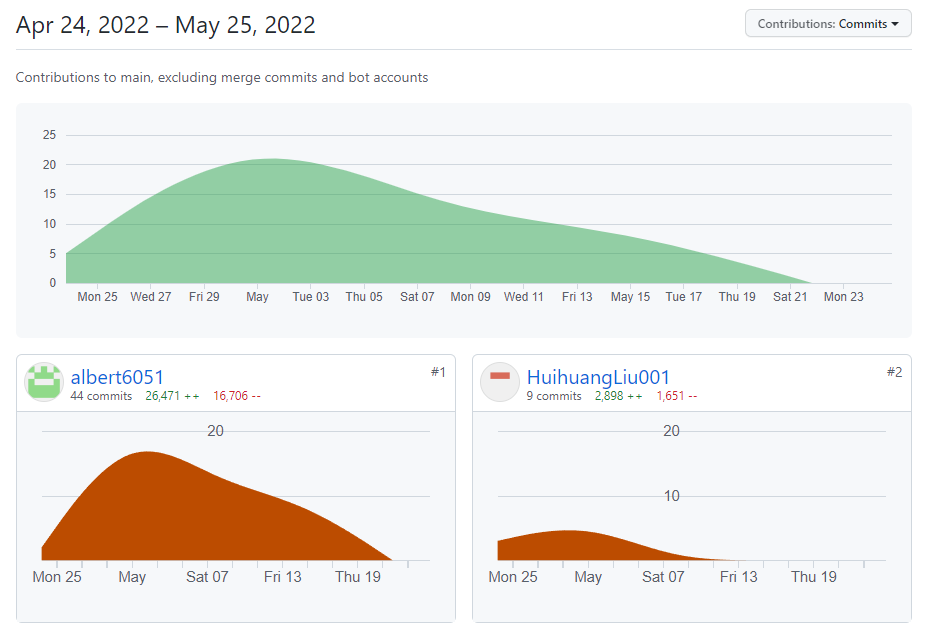

In [25]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/contribute/contribution.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*Contributor Graph from GitHub. albert6051 is Gong Qi Chen. HuihuangLiu001 is HuiHuang Liu.*

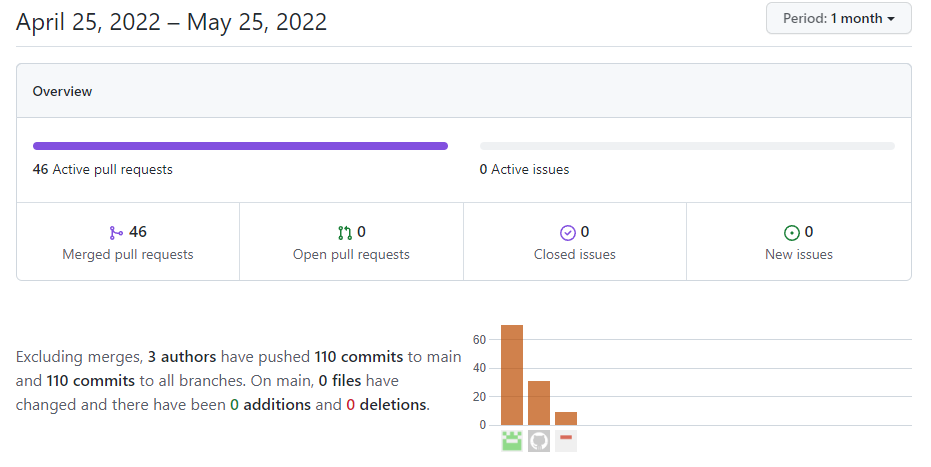

In [26]:
url = "https://raw.githubusercontent.com/albert6051/DSEI210-Final-Project--Skinjob/main/reports/figures/contribute/commits.png"
response = requests.get(url)
Image.open(BytesIO(response.content))

*Pulse summary from GitHub*

## Bibliography
1. Rosendahl, C., Tschandl, P., Cameron, A. & Kittler, H. Diagnostic accuracy of dermatoscopy for melanocytic and nonmelanocytic pigmented lesions. J Am Acad Dermatol 64, 1068–1073 (2011).

2. Bechelli S, Delhommelle J. Machine Learning and Deep Learning Algorithms for Skin Cancer Classification from Dermoscopic Images. Bioengineering (Basel). 2022;9(3):97. Published 2022 Feb 27.

3. Binder, M. et al. Application of an artificial neural network in epiluminescence microscopy pattern analysis of pigmented skin lesions: a pilot study. Br J Dermatol 130, 460–465 (1994).

4. Codella, N. C. F. et al. Skin Lesion Analysis Toward Melanoma Detection: A Challenge at the 2017 International Symposium on Biomedical Imaging (ISBI), Hosted by the International Skin Imaging Collaboration (ISIC). Preprint at https://arxiv.org/abs/1710.05006 (2017).

5. Deng, J. et al. ImageNet: A large-scale hierarchical image database, 2009 IEEE Conference on Computer Vision and Pattern Recognition, Miami, FL, 2009, pp. 248–255 (2009).

6. Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci Data 5, 180161 (2018). 

7. Dreiseitl, S., Binder, M., Hable, K. & Kittler, H. Computer versus human diagnosis of melanoma: evaluation of the feasibility of an automated diagnostic system in a prospective clinical trial. Melanoma Res 19, 180–184 (2009).

8. Kharazmi, P., Kalia, S., Lui, H., Wang, Z. J. & Lee, T. K. A feature fusion system for basal cell carcinoma detection through data-driven feature learning and patient profile. Skin Res Technol 24, 256–264 (2017).

9. Sinz, C. et al. Accuracy of dermatoscopy for the diagnosis of nonpigmented cancers of the skin. J Am Acad Dermatol 77, 1100–1109 (2017).

10. Esteva, A. et al. Dermatologist-level classification of skin cancer with deep neural networks. Nature 542, 115–118 (2017).

11. Han, S. S. et al. Classification of the clinical images for benign and malignant cutaneous tumors using a deep learning algorithm. J Invest Dermatol, Preprint at https://doi.org/10.1016/j.jid.2018.01.028 (2018).

12. Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi:10.1038/sdata.2018.161 (2018) https://doi.org/10.1038/sdata.2018.161

13. Tschandl, P., Rinner, C., Apalla, Z. et al. Human–computer collaboration for skin cancer recognition. Nat Med (2020). https://doi.org/10.1038/s41591-020-0942-0

14. Gerry. EfficientnetB5 F1 score~83% (2021). Kaggle https://www.kaggle.com/code/gpiosenka/efficientnetb5-f1-score-83

15. Manu Siddhartha. Step wise Approach : CNN Model (77.0344% Accuracy) (2018). Kaggle https://www.kaggle.com/code/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy

## Appendix